In [ ]:
# ..... plot MN scores across species ..... #

In [16]:
library(MetaNeighbor)

In [2]:
spelist = c('human', 'mouse', 'chicken', 'turtle', 'wfrog', 'zebrafish')
combos = combn(spelist, 2)
ctypes = c('Cardiomyocytes', 'CNS_neurons', 'Endothelium', 'Megakaryocytes', 'Mesoderm', 
           'Neural_crest_PNS_glia', 'Primitive_erythroid', 'White_blood_cells')
alltypes = paste0(rep(spelist, each = length(ctypes)), '|', rep(ctypes, length(spelist)))

In [13]:
mat1 = matrix(NA, nrow = length(alltypes), ncol = length(alltypes))
rownames(mat1) = alltypes
colnames(mat1) = alltypes
mat2 = mat1

for(ii in 1:dim(combos)[2]){
    spe1 = combos[1,ii]
    spe2 = combos[2,ii]
    fil1 = paste0(spe1, '_', spe2, '_MN_scores.Rdata')
    fil2 = paste0(spe2, '_', spe1, '_MN_scores.Rdata')
    
    if(file.exists(fil1)){
        load(fil1)
    }else{
        load(fil2)
    }
    
    ids = match(rownames(mn_all), alltypes)
    ids2 = which(!is.na(ids))
    ids = ids[!is.na(ids)]
    
    mat1[ids,ids] = mn_all[ids2,ids2]
    mat2[ids,ids] = mn_1v1[ids2,ids2]
}

In [19]:
# plot heatmaps #
exps = sub('\\|.*', '', rownames(mat1))
ctypes = sub('.*\\|', '', rownames(mat1))

subs2 = c('Cardiomyocytes', 'CNS_neurons', 'Endothelium', 'Megakaryocytes', 'Mesoderm', 
           'Neural_crest_PNS_glia', 'Primitive_erythroid', 'White_blood_cells')

subcol2 = c('#d43035', '#643b9f', '#fc6c85', '#358957', '#088f8f',
            '#3a9bdc', '#dce775', '#fdb515')            

reg2 = spelist
regcols2 = c('#8dd7bf', '#e77577', 'blue', 'red', 'black', '#bebebe')

cols1 = subcol2[match(ctypes, subs2)]
cols2 = regcols2[match(exps, reg2)]

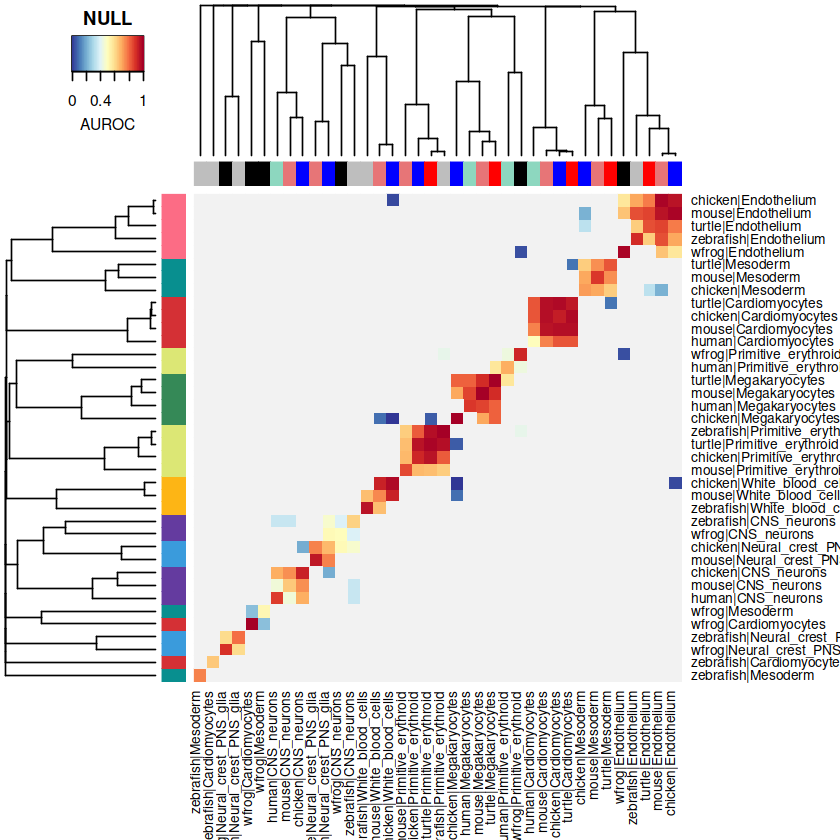

In [29]:
# png(paste0(stages[id], '_', samples[id], '_Mantri_MN.png'), width = 10, height = 10, res = 300, units = 'in')
# pdf('aa-6species-mn-1v1-spe.pdf', width = 10, height = 10)
currmat = mat2
keep_ids = which(rowSums(currmat, na.rm = T)>0)
plotHeatmap(currmat[keep_ids, keep_ids], ColSideColors = cols2[keep_ids], RowSideColors = cols1[keep_ids], 
            margins = c(10,10))
# dev.off()